<a href="https://colab.research.google.com/github/Gilgamesh60/ComputerVision-DeepLearning/blob/main/OpenCV/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Here I am using the images that I extracted for my project 'cartoon character classification' to learn various image processing techniques. This notebook is collection of all of my learnings.I learned this by reading archives on [PyImageSearch](https://pyimagesearch.com/category/opencv/)

**Downloading the libraries & dependencies**

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# **Image processing**

width=250, height=250, depth=3


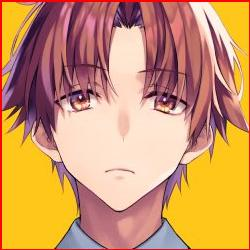

In [2]:
image=cv2.imread('/content/drive/MyDrive/cropped_images/ayanokoji_kiyotaka/jpg_11.jpg')
(h,w,d)=image.shape                             # Getting Image Shape
print(f"width={w}, height={h}, depth={d}")      # Inspecting Shape.
cv2_imshow(image)

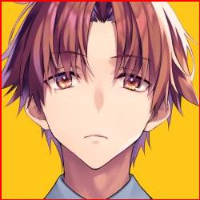

In [3]:
#resizing
resized = cv2.resize(image, (200, 200))         # Resizing Image. 
cv2_imshow(resized)                             # Inspecting Resized Image.

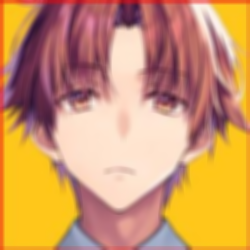

In [4]:
#blurring
blur=cv2.GaussianBlur(image,(7,7),cv2.BORDER_DEFAULT)   # blurred using 7*7 kernel
cv2_imshow(blur)

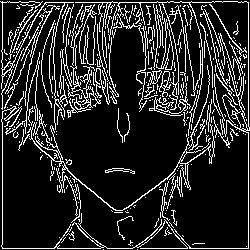

In [6]:
#Edge cascade for edge detection
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv2.Canny(image, t_lower, t_upper)
cv2_imshow(edge)

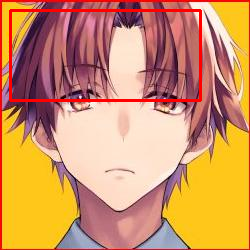

In [17]:
#@ DRAWING ON AN IMAGE: RECTANGLE: 
output = image.copy()                                           # Making a Copy. 
cv2.rectangle(output, (10,10), (200,100), (0, 0, 255), 2)    # Drawing on an Image. 
cv2_imshow(output)      

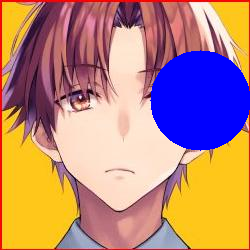

In [18]:
#@ DRAWING ON AN IMAGE: CIRCLE: 
output = image.copy()                               # Initializing Copy of Image. 
cv2.circle(output, (200, 100), 50, (255, 0, 0), -1) # Creating a Circle. 
cv2_imshow(output)                                  # Inspecting Image.

width=435, height=600, depth=3


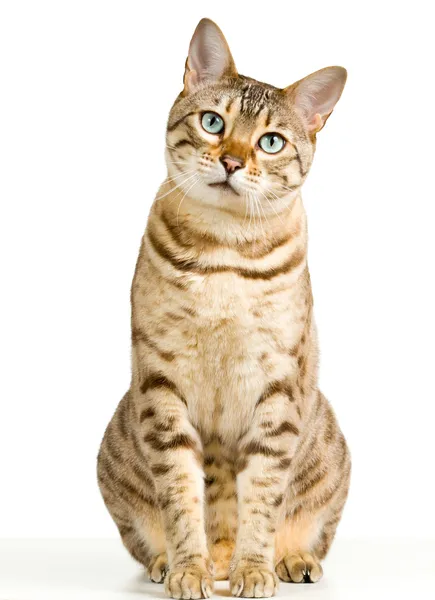

In [22]:
image=cv2.imread('/content/drive/MyDrive/depositphotos_4869272-stock-photo-bengal-cat-light-brown-cream.jpg')
(h,w,d)=image.shape                             # Getting Image Shape
print(f"width={w}, height={h}, depth={d}")      # Inspecting Shape.
cv2_imshow(image)

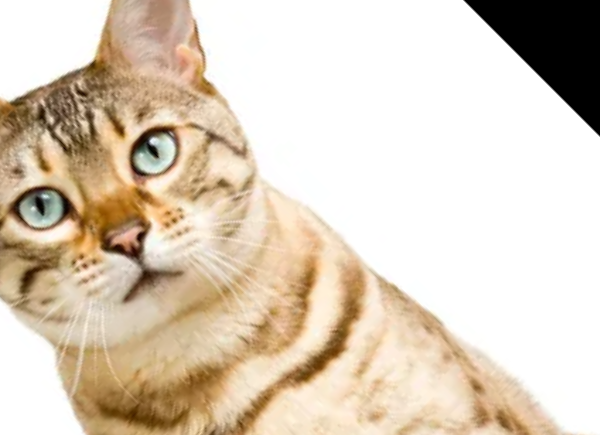

In [23]:
#rotate the image
def rotate(img,angle,rotpoint=None):

  (width,height)=img.shape[:2]

  if rotpoint==None:
    rotpoint=(width//2,height//2)
  
  rotmat=cv2.getRotationMatrix2D(rotpoint,45,scale=2.0)
  dimensions=(width,height)

  return cv2.warpAffine(img,rotmat,dimensions)


rotated=rotate(image,45)
cv2_imshow(rotated)

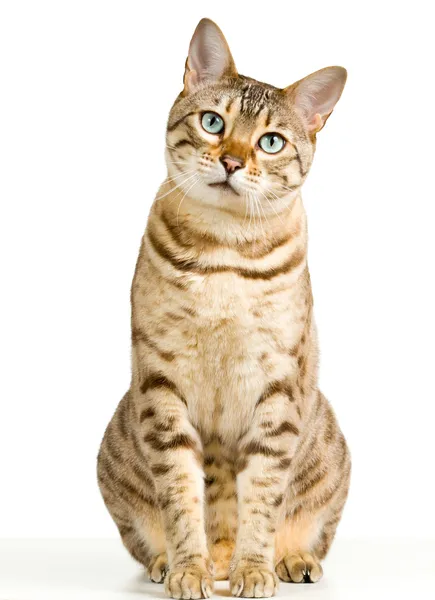

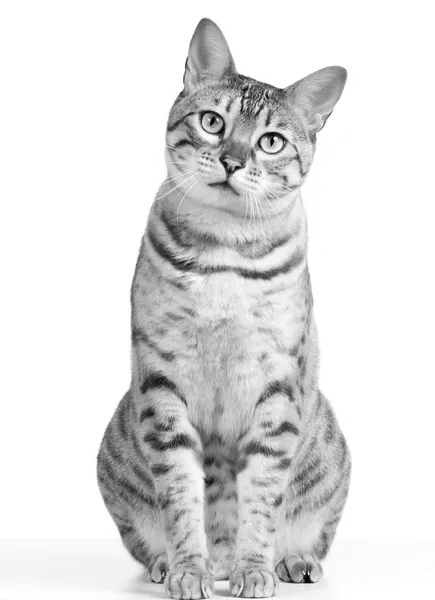

In [25]:

cv2_imshow(image)                                   # Inspecting the Image. 

#@ CONVERTING IMAGE TO GRAYSCALE: 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # Converting to Grayscale. 
cv2_imshow(gray)    

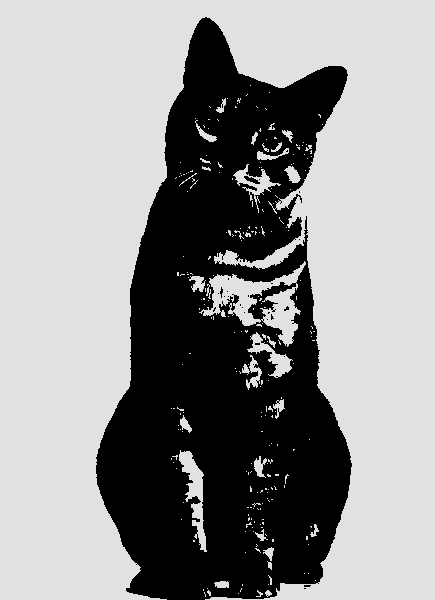

In [26]:
#@ INITIALIZING THRESHOLDING: 
thresh = cv2.threshold(gray, 225, 225, cv2.THRESH_BINARY)[1]
cv2_imshow(thresh)

In [33]:
(contour,hierarchy)=cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contour)))

Number of Contours found = 246


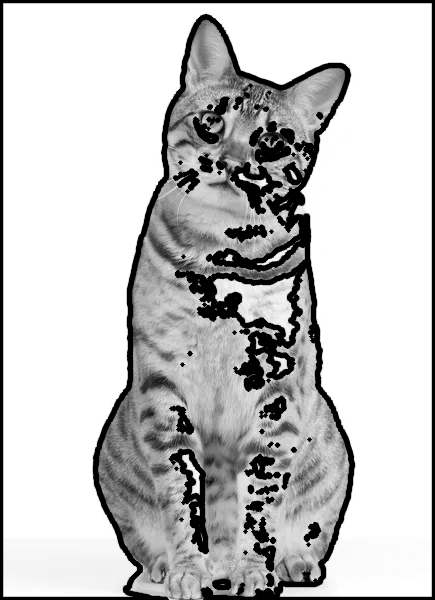

In [42]:
contoured=cv2.drawContours(image=gray, contours=contour, contourIdx=-2, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
cv2_imshow(contoured)

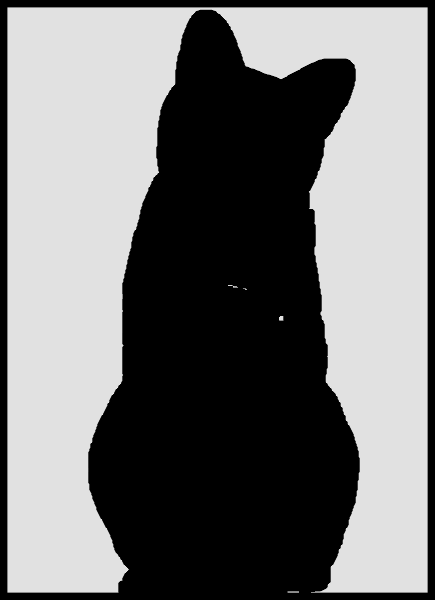

In [43]:
#@ INITIALIZING EROSIONS AND DILATIONS: 
mask = thresh.copy()                            # Initializing Copy of Image. 
mask = cv2.erode(mask, None, iterations=5)      # Initializing Erosions. 
cv2_imshow(mask)                                # Inspecting the Image.

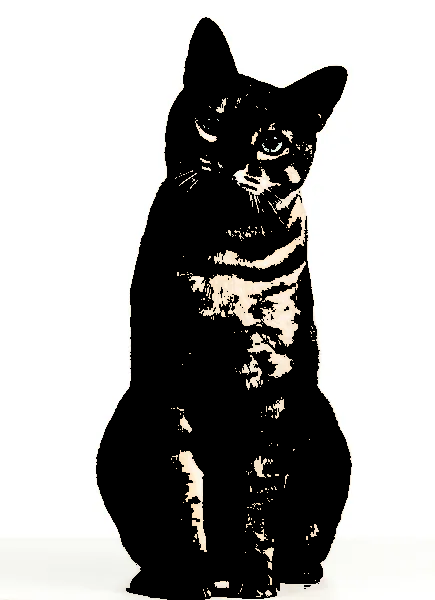

In [31]:
#@ INITIALIZING MASKING AND BITWISE OPERATIONS: 
mask = thresh.copy()                              # Initializing Copy of Image. 
output = cv2.bitwise_and(image, image, mask=mask) # Initializing Bitwise Masking. 
cv2_imshow(output)                                # Inspecting the Image.

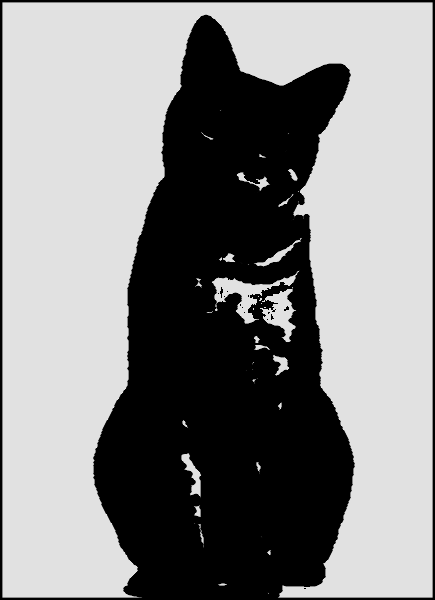

In [44]:

#@ INITIALIZING EROSIONS AND DILATIONS: 
mask = thresh.copy()                            # Initializing Copy of Image. 
mask = cv2.dilate(mask, None, iterations=0)     # Initializing Dilations. 
cv2_imshow(mask)                                # Inspecting the Image.